# Question 1:


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


What metric would you report for this dataset?


What is its value?


In [51]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('q1.csv')

In [5]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
df.order_amount.mean()

3145.128

To gain beter insight about why the AOV is so high, it is important to understand the distribution of the data:

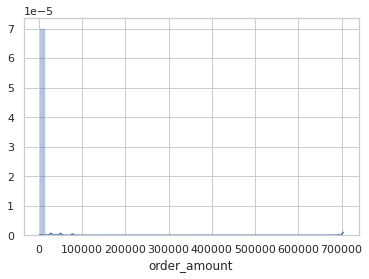

In [56]:
# Raw histogram and box plots with all of the data do not give us an accurate 
# representation of the distribution.

sns.distplot(df['order_amount']);

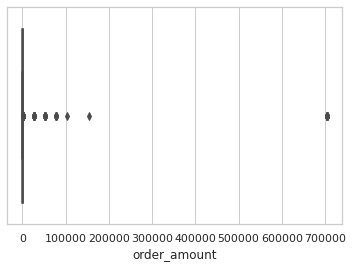

In [40]:
sns.boxplot(x=df["order_amount"]);

In [68]:
quantile_99 = df["order_amount"].quantile(0.99)
quantile_98 = df["order_amount"].quantile(0.98)
print("99th Quantile:", int(quantile_99))
print("98th Quantile:", int(quantile_98))

99th Quantile: 25725
98th Quantile: 800


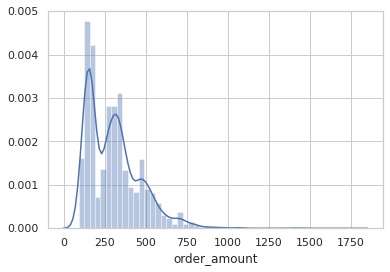

In [65]:
# Histogram and Box Plot with values under the 99th quantile gives us a 
# much more accurate of what the distribution is actually like
sns.distplot(df[df['order_amount'] < quantile_99]["order_amount"]);

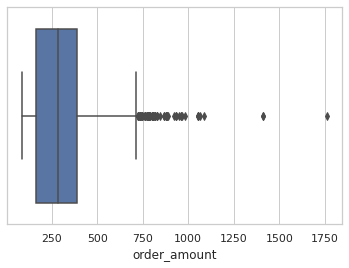

In [66]:
sns.boxplot(x=df[df['order_amount'] < quantile_99]["order_amount"]);

It looks like the average order value is getting extremely skewed by some very large purchase orders - outliers. Only 2% of all of the orders are above $800.  However, it seems that those outliers are extremely large ranging from 100,000 to over 700,000, greatly skewing the average. A better metric for this would be the median, because it gives us more of an idea of what a "typical" order is like without being skewed by the super expensive orders.

In [70]:
print("Median order value:", df.order_amount.median())

Median order value: 284.0


# Question 2:

SQL with [this data set](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL)

### How many orders were shipped by Speedy Express in total?

In [ ]:
SELECT COUNT(OrderID)
FROM Orders
INNER JOIN Shippers 
ON Orders.ShipperID=Shippers.ShipperID;

There were **196** orders shipped by Speedy Express

### What is the last name of the employee with the most orders?

In [ ]:
SELECT TOP 1 Employees.LastName
FROM (
	SELECT COUNT(*) as OrderCount, EmployeeID
	FROM Orders
	GROUP BY EmployeeID
) as Counts
INNER JOIN Employees
ON Employees.EmployeeID=Counts.EmployeeID
ORDER BY OrderCount DESC;

The employee with the most orders has the last name **Peacock**

### What product was ordered the most by customers in Germany?

In [ ]:
SELECT TOP 1 P.*
FROM (
	SELECT SUM(OD.Quantity) as ProductQuantity, OD.ProductID 
	FROM OrderDetails as OD
	INNER JOIN Orders as O 
	ON OD.OrderID = O.OrderID
	WHERE O.CustomerID IN (
		SELECT CustomerID
    	FROM Customers
    	WHERE Country = 'Germany'
	)
	GROUP BY ProductID
) as ProductQuantities
INNER JOIN Products as P
ON ProductQuantities.ProductID = P.ProductID
ORDER BY ProductQuantities.ProductQuantity DESC;

ProductID: 40

ProductName: Boston Crab Meat

SupplierID: 19

CategoryID: 8

Unit: 24 - 4oz tins

Price: 18.4